#### <img src="./../res/logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales 

# Tarea Semanal Nº6
#### Alumno: Mauro Fernández

# 1. Consigna

En esta tarea experimentaremos algunos conceptos presentados en el libro de *Holton. DSP Principles and App*.

**a)** Implementar las funciones para generar las siguientes ventanas $w(k)$:

* Rectangular
* Bartlett ó triangular
* Hann
* Blackman
* Flat-top

**Ayuda**: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

**b)** Para cada ventana grafique $w(k)$ y $|W(Ω)|$, para $N = 1000$ muestras, normalizando $w(k)$ de forma tal que la amplitud máxima de $|W(Ω)|$ (lóbulo principal) sea 0 dB.

**Ayuda**: Posiblemente convenga utilizar zero-padding para visualizar mejor $|W(Ω)|$.

**c)** Construya una tabla en la que figuren **dos mediciones** de la anchura del lóbulo principal de cada ventana:

* $Ω_0$ será la frecuencia del primer cruce por cero, es decir $|W(Ω)| = 0$ y 
* $Ω_1$, aquella frecuencia tal que $\lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2} \vee -3$ dB y 
* el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)

$$W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0$$

**Sugerencia**: Normalice $\Omega_{0,1}$ por $\Delta_f = \frac{f_S}{N}$ para facilitar la comparación.

<img src="./tabla.png" align="center" width="511" />

**Bonus**
* Hacer un gráfico comparativo de todas las ventanas
* Indicar en el mismo gráfico los valores fiduciales de la tabla.

# 2. Resolución

## 2.1. Implementación de funciones para generación de ventanas $𝑤(𝑘)$

In [218]:
# Importamos módulos a utilizar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import EngFormatter
from pandas import DataFrame
from IPython.display import HTML

# Configuramos tamaño de gráficos
mpl.rcParams['figure.figsize'] = (15,7)

# Configuramos tamaño de fuentes de gráficos
plt.rcParams.update({'font.size': 16})

def window_rectangular(L):
    """ Implementación de ventana rectangular
    
    Args:
        L longitud de la ventana en cantidad de muestras
        
    Returns:
        w amplitudes de la ventana en cada muestra
    """
    
    # Validación de la cantidad de muestras
    if L == 1:
        return 1
    
    # Valor máximo de indice
    N = L - 1
    
    # Generamos grilla para almacenar amplitudes de la ventana para cada muestra
    # Temporalmente el valor de cada posición es la del indice a fin de usar como referencia
    w = np.linspace(0,N,L)

    # Asignamos valor unitario a todas las posiciones del vector
    w[:]  = 1
    
    return w

def window_bartlett(L):
    """ Implementación de ventana Bartlett
    
    Args:
        L longitud de la ventana en cantidad de muestras
        
    Returns:
        w amplitudes de la ventana en cada muestra
    """
    
    # Validación de la cantidad de muestras
    if L == 1:
        return 1

    # Valor máximo de indice
    N = L - 1
    
    # Generamos grilla para almacenar amplitudes de la ventana para cada muestra
    # Temporalmente el valor de cada posición es la del indice a fin de usar como referencia
    w = np.linspace(0,N,L)
    
    # Generamos indexadores booleanos acorde expresión analítica de ventana
    b1 = ((w >= 0)   & (w <= N/2))
    b2 = ((w >= N/2) & (w <= N))
    
    # Asignamos valores de amplitud de la ventana acorde indexadores booleanos generados
    w[b1] = 2 * w[b1] / N 
    w[b2] = 2 - (2 * w[b2] / N)
    
    return w

def window_hann(L):
    """ Implementación de ventana Hann
    
    Args:
        L cantidad de muestras
        
    Returns:
        w amplitudes de la ventana en cada muestra
    """
    
    # Validación de la cantidad de muestras
    if L == 1:
        return 1

    # Valor máximo de indice
    N = L - 1

    # Generamos grilla para almacenar amplitudes de la ventana para cada muestra
    # Temporalmente el valor de cada posición es la del indice a fin de usar como referencia
    w = np.linspace(0,N,L)
    
    # Generamos indexador booleano acorde expresión analítica de ventana
    b1 = ((w >= 0)   & (w <= N))
    
    # Asignamos valores de amplitud de la ventana acorde indexador booleano generado
    w[b1] = 0.5 - 0.5 * np.cos(2*np.pi*w[b1]/N)
    
    return w    

def window_blackman(L):
    """ Implementación de ventana Blackman
    
    Args:
        L cantidad de muestras
        
    Returns:
        w amplitudes de la ventana en cada muestra
    """
    
    # Validación de la cantidad de muestras
    if L == 1:
        return 1

    # Valor máximo de indice
    N = L - 1

    # Generamos grilla para almacenar amplitudes de la ventana para cada muestra
    # Temporalmente el valor de cada posición es la del indice a fin de usar como referencia
    w = np.linspace(0,N,L)
    
    # Generamos indexador booleano acorde expresión analítica de ventana
    b1 = ((w >= 0)   & (w <= N))
    
    # Asignamos valores de amplitud de la ventana acorde indexador booleano generado
    w[b1] = 0.42 - 0.5 * np.cos(2*np.pi*w[b1]/N) + 0.08 * np.cos(4*np.pi*w[b1]/N) 
    
    return w  

def window_flat_top(L):
    """ Implementación de ventana Blackman
    
    Args:
        L cantidad de muestras
        
    Returns:
        w amplitudes de la ventana en cada muestra
    """
    
    # Validación de la cantidad de muestras
    if L == 1:
        return 1
    
    # Valor máximo de indice
    N = L - 1
    
    # Definimos amplitud de los cosenos que forman la ventana
    a0 = 0.21557895
    a1 = 0.41663158
    a2 = 0.277263158
    a3 = 0.083578947
    a4 = 0.006947368

    # Generamos grilla para almacenar amplitudes de la ventana para cada muestra
    # Temporalmente el valor de cada posición es la del indice a fin de usar como referencia
    w = np.linspace(0,N,L)
    
    # Generamos indexador booleano acorde expresión analítica de ventana
    b1 = ((w >= 0)   & (w <= N))
    
    # Asignamos valores de amplitud de la ventana acorde indexador booleano generado
    w[b1] = a0 - a1 * np.cos(2*np.pi*w[b1]/N) + a2 * np.cos(4*np.pi*w[b1]/N) - a3 * np.cos(6*np.pi*w[b1]/N) + a4 * np.cos(8*np.pi*w[b1]/N)  
        
    return w  

## 2.2. Graficación de las ventanas en el dominio del tiempo: w(k) 

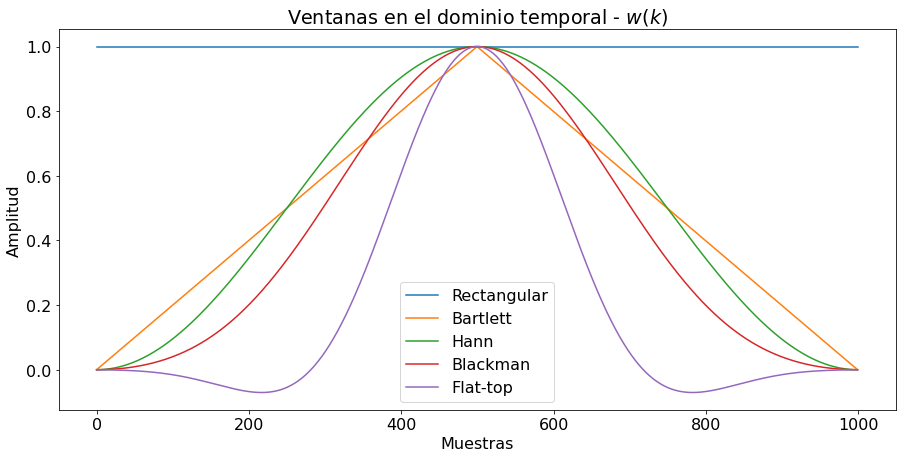

In [219]:
# Definimos la cantidad de muestras para todas las ventanas
N = 1000

# Obtenemos las amplitudes para cada ventana
ww_rectangular = window_rectangular(N)
ww_bartlett    = window_bartlett(N)
ww_hann        = window_hann(N)
ww_blackman    = window_blackman(N)
ww_flat_top    = window_flat_top(N)

# Graficamos las ventanas en el dominio del tiempo
plt.figure()
plt.title("Ventanas en el dominio temporal - $w(k)$")
plt.plot(ww_rectangular, label="Rectangular")
plt.plot(ww_bartlett,    label="Bartlett")
plt.plot(ww_hann,        label="Hann")
plt.plot(ww_blackman,    label="Blackman")
plt.plot(ww_flat_top,    label="Flat-top")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

## 2.3. Graficación y mediciones de las ventanas en el dominio de la frecuencia: $|W(\Omega)|$

A continuación se presenta en un gráfico unificado los espectros de amplitud de las ventanas.

En el gráfico a su vez se indican los puntos de cruce por 0, amplitud = -3dB y máxima amplitud tras cruce por cero, marcados con una cruz, círculo y triangulo respectivamente. Los valores de referencia de dichos puntos se exponen tras el gráfico en una tabla.

Para visualizar adecuadamente los espectros de las ventanas aplicamos la técnica de zero-padding en las mismas.

Para que la amplitud máxima de $|W(\Omega)|$ (lóbulo principal) sea 0dB normalizamos $w(k)$ por su valor medio, a fin de obtener en veces una componente de continua unitaria, lo que en dB al aplicar $log_{10}$ es igual a 0.

En la conversión de veces a dB, para evitar el error de calcular el logaritmo de 0, sumamos a las amplitudes de los espectros un valor muy pequeño (resolución del número flotante: eps).

La frecuencia se normaliza en función de la resolución espectral de las ventanas (sin padding).

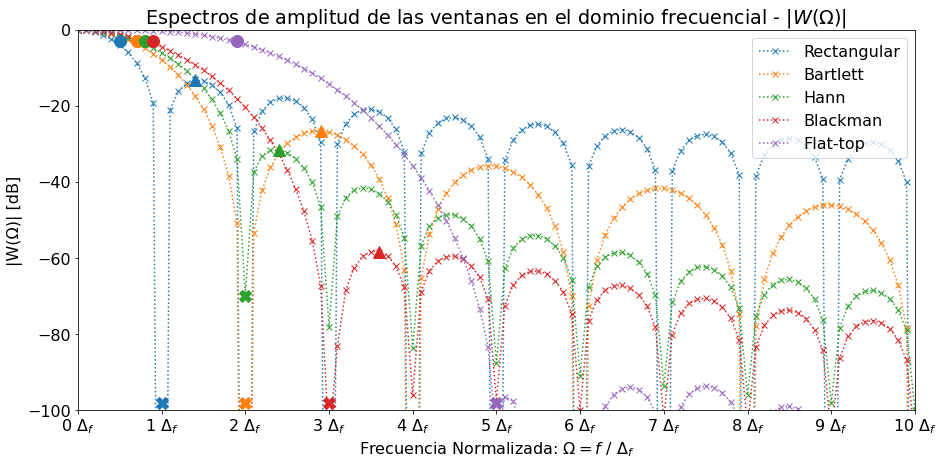

,$\Omega_0$,$\Omega_1$,$W_2$
Rectangular,$1.0\ \Delta_f$,$0.5\ \Delta_f$,$-13.0\ dB$
Bartlett,$2.0\ \Delta_f$,$0.7\ \Delta_f$,$-27.0\ dB$
Hann,$2.0\ \Delta_f$,$0.8\ \Delta_f$,$-32.0\ dB$
Blackman,$3.0\ \Delta_f$,$0.9\ \Delta_f$,$-58.0\ dB$
Flat-top,$5.0\ \Delta_f$,$1.9\ \Delta_f$,$-93.0\ dB$


In [220]:
# Definimos la cantidad de padding a aplicar
cant_pad = 9

# Generamos un vector de ceros con el tamaño del vector original a paddear
zz = np.zeros(N)

# Repetimos el vector tantas veces como padding a aplicar
padding = zz.repeat(cant_pad, axis = 0)

# Aplicamos el padding a las ventanas generadas
ww_rectangular_pad = np.hstack([ww_rectangular, padding])
ww_bartlett_pad    = np.hstack([ww_bartlett,    padding])
ww_hann_pad        = np.hstack([ww_hann,        padding])
ww_blackman_pad    = np.hstack([ww_blackman,    padding])
ww_flat_top_pad    = np.hstack([ww_flat_top,    padding])

# Normalizamos las ventanas por el valor medio
ww_rectangular_pad = ww_rectangular_pad / np.mean(ww_rectangular_pad)
ww_bartlett_pad    = ww_bartlett_pad    / np.mean(ww_bartlett_pad)
ww_hann_pad        = ww_hann_pad        / np.mean(ww_hann_pad)
ww_blackman_pad    = ww_blackman_pad    / np.mean(ww_blackman_pad)
ww_flat_top_pad    = ww_flat_top_pad    / np.mean(ww_flat_top_pad)

# Obtenemos el nuevo tamaño de los vectores con padding
N_Pad = ww_bartlett_pad.shape[0]

# Definimos frecuencia de muestreo
# Nota: Utilizamos una fs distinta de 1000 Hz para evidenciar la independización de la frecuencia al normalizar
fs = 2000

# Calculamos resolución espectral de la señal original
df = fs/N

# Calculamos resolución espectral para señales con padding
df_p = fs/N_Pad

# Generamos grilla frecuencial para señales con padding
ff = np.linspace(0, (N_Pad-1)*df_p, N_Pad)

# Definimos la norma para normalización de la frecuencia
# Queremos la frecuencia normalizada sea en función de la resolución espectral original sin padding. 
# 1 = df, 2 = 2df, 3 = 3df, etc.
norm = 1/df

# Normalizamos la grilla frecuencial
ff *= norm

# Generamos indexador de los bines acorde rango de frecuencias normalizadas de interés
bfrec = ff <= ((fs/2) * norm)
    
# Calculamos la FFT de las ventanas generadas
WW_rectangular_pad = 1/N_Pad * np.fft.fft(ww_rectangular_pad)
WW_bartlett_pad    = 1/N_Pad * np.fft.fft(ww_bartlett_pad)
WW_hann_pad        = 1/N_Pad * np.fft.fft(ww_hann_pad)
WW_blackman_pad    = 1/N_Pad * np.fft.fft(ww_blackman_pad)
WW_flat_top_pad    = 1/N_Pad * np.fft.fft(ww_flat_top_pad)

# Para evitar aplicar logaritmo a amplitudes iguales a 0, vamos a sumar resolución de flotante a cada amplitud
eps = np.finfo(float).eps

# Espectros de amplitud en dB de cada ventana
WW_rectangular_db = 20*np.log10(np.abs(WW_rectangular_pad[bfrec])+eps)
WW_bartlett_db    = 20*np.log10(np.abs(WW_bartlett_pad[bfrec])+eps)
WW_hann_db        = 20*np.log10(np.abs(WW_hann_pad[bfrec])+eps)
WW_blackman_db    = 20*np.log10(np.abs(WW_blackman_pad[bfrec])+eps)
WW_flat_top_db    = 20*np.log10(np.abs(WW_flat_top_pad[bfrec])+eps)

#------------------------------------------------------------------------------
# BUSQUEDA DE LAS FRECUENCIAS ASOCIADAS AL PRIMER CURCE POR 0 
#------------------------------------------------------------------------------

# Indices de los cruces por 0 (es aquel donde la amplitud en db se encuentra por debajo de un umbral)
idx_rectangular_first_0 = np.where(WW_rectangular_db <= -100)[0][0]
idx_bartlett_first_0    = np.where(WW_bartlett_db    <= -100)[0][0]
idx_hann_first_0        = np.where(WW_hann_db        <= -60)[0][0]
idx_blackman_first_0    = np.where(WW_blackman_db    <= -100)[0][0]
idx_flat_top_first_0    = np.where(WW_flat_top_db    <= -100)[0][0]

# Frecuencias asociadas a los cruces por 0
ff_rectangular_first_0 = ff[idx_rectangular_first_0]
ff_bartlett_first_0    = ff[idx_bartlett_first_0]
ff_hann_first_0        = ff[idx_hann_first_0]
ff_blackman_first_0    = ff[idx_blackman_first_0]
ff_flat_top_first_0    = ff[idx_flat_top_first_0]

#------------------------------------------------------------------------------
# BUSQUEDA DE LAS FRECUENCIAS ASOCIADAS A -3dB
#------------------------------------------------------------------------------

# Frecuencias asociadas a -3dB (es aquel donde la amplitud en db se encuentra por debajo de un umbral)
ff_rectangular_3db = ff[np.where(WW_rectangular_db <= -3)[0][0]]
ff_bartlett_3db    = ff[np.where(WW_bartlett_db    <= -3)[0][0]]
ff_hann_3db        = ff[np.where(WW_hann_db        <= -3)[0][0]]
ff_blackman_3db    = ff[np.where(WW_blackman_db    <= -3)[0][0]]
ff_flat_top_3db    = ff[np.where(WW_flat_top_db    <= -3)[0][0]]

#------------------------------------------------------------------------------
# BUSQUEDA DE LA AMPLITUD MÁXIMA TRAS PRIMER CURCE POR 0
#------------------------------------------------------------------------------

# Indices de las amplitudes máximas (se busca con argmax con slicing desde el cruce por cero y luego corregimos offset)
idx_rectangular_w2 = np.argmax(WW_rectangular_db[idx_rectangular_first_0:]) + idx_rectangular_first_0
idx_bartlett_w2    = np.argmax(WW_bartlett_db   [idx_bartlett_first_0   :]) + idx_bartlett_first_0
idx_hann_w2        = np.argmax(WW_hann_db       [idx_hann_first_0       :]) + idx_hann_first_0
idx_blackman_w2    = np.argmax(WW_blackman_db   [idx_blackman_first_0   :]) + idx_blackman_first_0  
idx_flat_top_w2    = np.argmax(WW_flat_top_db   [idx_flat_top_first_0   :]) + idx_flat_top_first_0   

# Frecuencias a las amplitudes máximas
ff_rectangular_w2 = ff[idx_rectangular_w2]
ff_bartlett_w2    = ff[idx_bartlett_w2   ]
ff_hann_w2        = ff[idx_hann_w2       ]
ff_blackman_w2    = ff[idx_blackman_w2   ]
ff_flat_top_w2    = ff[idx_flat_top_w2   ]

# Amplitudes máximas
rectangular_w2 = WW_rectangular_db[idx_rectangular_w2]
bartlett_w2    = WW_bartlett_db   [idx_bartlett_w2   ]
hann_w2        = WW_hann_db       [idx_hann_w2       ]
blackman_w2    = WW_blackman_db   [idx_blackman_w2   ]
flat_top_w2    = WW_flat_top_db   [idx_flat_top_w2   ]

#------------------------------------------------------------------------------
# GRAFICACIÓN DE LOS ESPECTROS
#------------------------------------------------------------------------------

fig, ax = plt.subplots()

plt.title("Espectros de amplitud de las ventanas en el dominio frecuencial - $|W(Ω)|$")

# Espectros de amplitud de las ventanas
ax.plot(ff[bfrec],WW_rectangular_db,':x', label="Rectangular")
ax.plot(ff[bfrec],WW_bartlett_db,   ':x', label="Bartlett")
ax.plot(ff[bfrec],WW_hann_db,       ':x', label="Hann")
ax.plot(ff[bfrec],WW_blackman_db,   ':x', label="Blackman")
ax.plot(ff[bfrec],WW_flat_top_db,   ':x', label="Flat-top")

# Puntos de cruce por 0
ax.plot(ff_rectangular_first_0, -98, 'X',color="tab:blue",   markersize=12)
ax.plot(ff_bartlett_first_0,    -98, 'X',color="tab:orange", markersize=12)
ax.plot(ff_hann_first_0,        -70, 'X',color="tab:green",  markersize=12)
ax.plot(ff_blackman_first_0,    -98, 'X',color="tab:red",    markersize=12)
ax.plot(ff_flat_top_first_0,    -98, 'X',color="tab:purple", markersize=12)

# Puntos de -3dB
ax.plot(ff_rectangular_3db, -3, 'o',color="tab:blue",   markersize=12)
ax.plot(ff_bartlett_3db,    -3, 'o',color="tab:orange", markersize=12)
ax.plot(ff_hann_3db,        -3, 'o',color="tab:green",  markersize=12)
ax.plot(ff_blackman_3db,    -3, 'o',color="tab:red",    markersize=12)
ax.plot(ff_flat_top_3db,    -3, 'o',color="tab:purple", markersize=12)

# Puntos de máxima amplitud
ax.plot(ff_rectangular_w2, rectangular_w2, '^',color="tab:blue",   markersize=12)
ax.plot(ff_bartlett_w2,    bartlett_w2   , '^',color="tab:orange", markersize=12)
ax.plot(ff_hann_w2,        hann_w2       , '^',color="tab:green",  markersize=12)
ax.plot(ff_blackman_w2,    blackman_w2   , '^',color="tab:red",    markersize=12)
ax.plot(ff_flat_top_w2,    flat_top_w2   , '^',color="tab:purple", markersize=12)

ax.set_xlim([0,10])
ax.set_ylim([-100,0])
ax.xaxis.set_major_formatter(EngFormatter(unit=u"$\Delta_f$"))
ax.set_ylabel("|W(Ω)| [dB]")
ax.set_xlabel("Frecuencia Normalizada: $Ω = f $ / $\Delta_f$")
ax.set_xticks(np.linspace(0, (11-1), 11))
ax.legend(loc='upper right')

plt.show()

#------------------------------------------------------------------------------
# PRESENTACIÓN DE LOS DATOS EN UNA TABLA
#------------------------------------------------------------------------------

data = [["${}\ \Delta_f$".format(np.round(ff_rectangular_first_0,2)), "${}\ \Delta_f$".format(np.round(ff_rectangular_3db,2)), "${}\ dB$".format(np.round(rectangular_w2))],
        ["${}\ \Delta_f$".format(np.round(ff_bartlett_first_0,2)),    "${}\ \Delta_f$".format(np.round(ff_bartlett_3db,2)),    "${}\ dB$".format(np.round(bartlett_w2   ))],
        ["${}\ \Delta_f$".format(np.round(ff_hann_first_0,2)),        "${}\ \Delta_f$".format(np.round(ff_hann_3db,2)),        "${}\ dB$".format(np.round(hann_w2       ))],
        ["${}\ \Delta_f$".format(np.round(ff_blackman_first_0,2)),    "${}\ \Delta_f$".format(np.round(ff_blackman_3db,2)),    "${}\ dB$".format(np.round(blackman_w2   ))],
        ["${}\ \Delta_f$".format(np.round(ff_flat_top_first_0,2)),    "${}\ \Delta_f$".format(np.round(ff_flat_top_3db,2)),    "${}\ dB$".format(np.round(flat_top_w2   ))]
       ]

df = DataFrame(data,columns=['$\Omega_0$', '$\Omega_1$', '$W_2$' ],
                index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'])
HTML(df.to_html())